In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

In [24]:
df = pd.read_csv('/Users/moonbansal/Downloads/4-1/temp_data_nasa.csv')

print(df.columns)

Index(['Year', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep',
       'Oct', 'Nov', 'Dec', 'J-D', 'D-N', 'DJF', 'MAM', 'JJA', 'SON'],
      dtype='object')


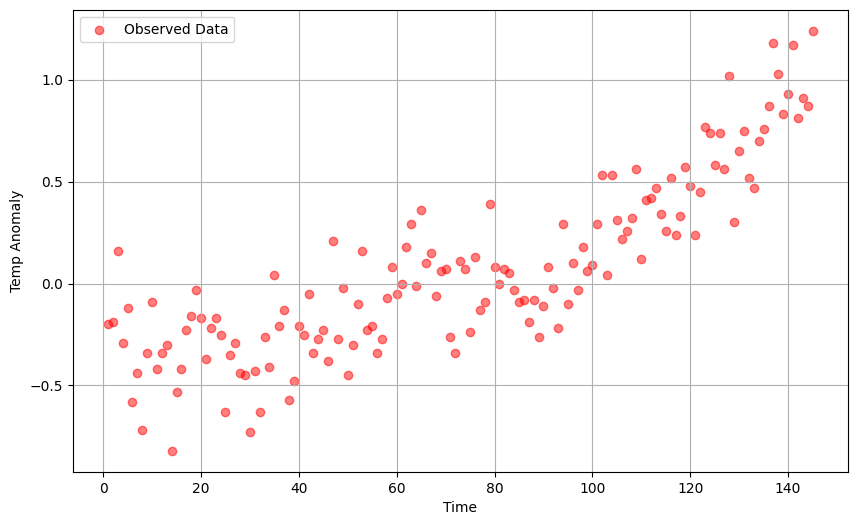

In [25]:
#df.set_index(inplace=True)
df = df[['Year', 'Jan']].dropna()

#time index
n_months = len(df)
t = np.arange(1, n_months + 1)

Y_t = df['Jan'].values #temp anomalies

plt.figure(figsize=(10,6))
plt.scatter(t, Y_t, color='red', label='Observed Data', alpha=0.5)
plt.xlabel('Time')
plt.ylabel('Temp Anomaly')
plt.legend()
plt.grid(True)
plt.show()

                            OLS Regression Results                            
Dep. Variable:                    Jan   R-squared:                       0.715
Model:                            OLS   Adj. R-squared:                  0.713
Method:                 Least Squares   F-statistic:                     359.1
Date:                Thu, 12 Sep 2024   Prob (F-statistic):           7.82e-41
Time:                        10:50:12   Log-Likelihood:                 6.9408
No. Observations:                 145   AIC:                            -9.882
Df Residuals:                     143   BIC:                            -3.928
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.5680      0.039    -14.647      0.0

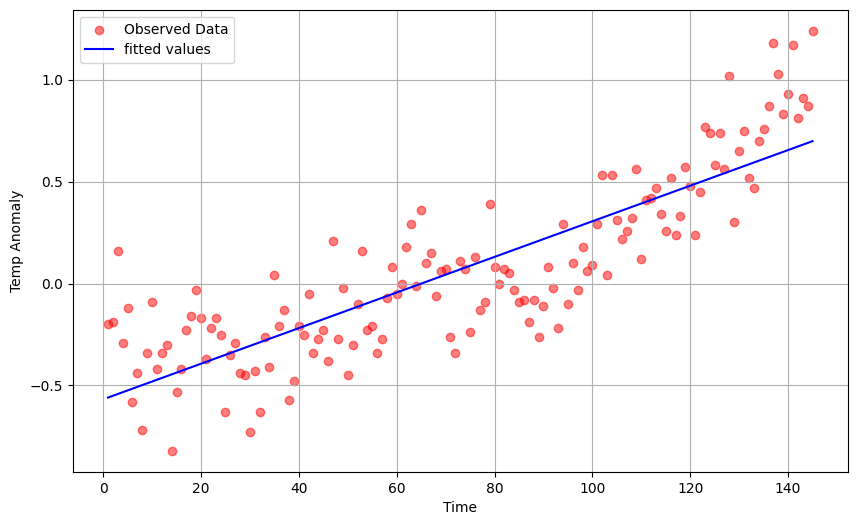

In [36]:
x = sm.add_constant(t)

result = sm.OLS(df['Jan'], x).fit()

print(result.summary())

plt.figure(figsize=(10,6))
plt.scatter(t, Y_t, color='red', label='Observed Data', alpha=0.5)
plt.plot(t, result.fittedvalues, color='b', label='fitted values')
plt.xlabel('Time')
plt.ylabel('Temp Anomaly')
plt.legend()
plt.grid(True)
plt.show()